# Projeto - Interconnect
-----------------------------------------

## Objetivo:
O objetivo deste plano de trabalho é desenvolver um modelo de predição de rotatividade de clientes para a operadora de comunicações Interconnect, usando técnicas de análise de dados e ciência de dados. O modelo ajudará a identificar clientes que planejam trocar de operadora, permitindo que a empresa tome medidas proativas para retê-los.

## Etapas do Projeto:



### Importando a biblioteca pandas:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'pandas'

### Carregando os dataframes:

In [ ]:
path = r'/datasets/final_provider/'

contract_data = pd.read_csv(path + 'contract.csv')
personal_data = pd.read_csv(path + 'personal.csv')
internet_data = pd.read_csv(path + 'internet.csv')
phone_data = pd.read_csv(path + 'phone.csv')

#### Analisando as cinco primeiras linhas de cada DataFrame para avaliar seu conteúdo:

In [ ]:
print("Dados do Contrato:")
contract_data.head()

Dados do Contrato:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
print("\nDados Pessoais:")
personal_data.head()


Dados Pessoais:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
print("\nDados de Internet:")
internet_data.head()


Dados de Internet:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [ ]:
print("\nDados de Telefone:")
phone_data.head()


Dados de Telefone:


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


* Foram identificadas no DataFrame `contract_data` que possuem colunas numéricas ( `PaymentMethod`, `MonthlyCharges` e `TotalCharges`) que podem nos ajudar a identificar o perfil de cada cliente, podendo ser variáveis importantes para predição de rotatividade.

### Análise exploratória:

* Inicialmente será feito a análise do conteúdo de cada coluna, para identificar possíveis valores com tipo diferente.

In [ ]:
contract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [ ]:
personal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
phone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


- Foram verificadas algumas colunas com valores diferentes do esperado e serão modificados logo abaixo:

### Substituindo os valores em branco por NaN

In [ ]:
contract_data['TotalCharges'] = contract_data['TotalCharges'].replace(' ', np.nan)

### Converção da coluna `TotalCharges` para float

In [ ]:

contract_data['TotalCharges'] = pd.to_numeric(contract_data['TotalCharges'])

### Transformando a coluna `BeginDate` em datetime

In [ ]:
contract_data['BeginDate'] = pd.to_datetime(contract_data['BeginDate'])

In [ ]:
contract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


## Combinação dos DataFrames

### Os dataframes serão combinados através da coluna de ID do cliente, essa ação tem o intuito do trabalhar com todas as informações em apenas um DataFrame:

In [ ]:
merged_data = pd.merge(contract_data, personal_data, on='customerID', how='inner')
merged_data = pd.merge(merged_data, internet_data, on='customerID', how='left')
merged_data = pd.merge(merged_data, phone_data, on='customerID', how='left')

- Será avaliado as 5 primeiras linhas do DataFrame, se as colunas permaneceram conforme o código acima, se os tipos das variáveis se mantiveram:

In [ ]:
merged_data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

- Foi avaliado que possuímos valores ausentes, em seguida será avaliádo os valores da média, mediana, e outliers das colunas numéricas:

In [ ]:
numeric_cols = merged_data.select_dtypes(include=['int64', 'float64'])
print(numeric_cols.describe())

       MonthlyCharges  TotalCharges  SeniorCitizen
count     7043.000000   7032.000000    7043.000000
mean        64.761692   2283.300441       0.162147
std         30.090047   2266.771362       0.368612
min         18.250000     18.800000       0.000000
25%         35.500000    401.450000       0.000000
50%         70.350000   1397.475000       0.000000
75%         89.850000   3794.737500       0.000000
max        118.750000   8684.800000       1.000000


### Elaboração de gráficos de boxplot para verificação de outliers:

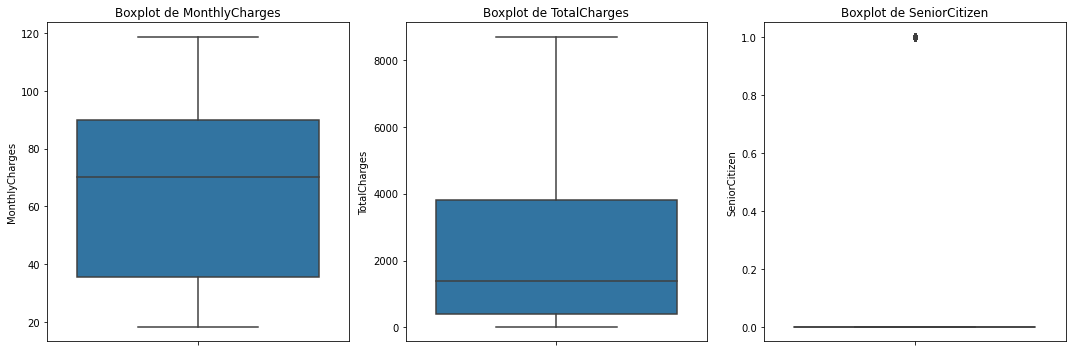

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['MonthlyCharges', 'TotalCharges', 'SeniorCitizen']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=merged_data, y=col)
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

#### Conclusão intermediária
Fiz uma fusão de todos os Daframes para trabalhar com apenas um DF, notei que há valores ausentes e posteriormente avaliarei como preencherei os valores ausentes e  não foram detectados outliers nas colunas numéricas, demosntrando que os valores das médias podem estar normalizados.

### Vou avaliar através de gráficos de histograma e de correlação se há algum padrão no comportamento das variáveis numéricas dos clientes:

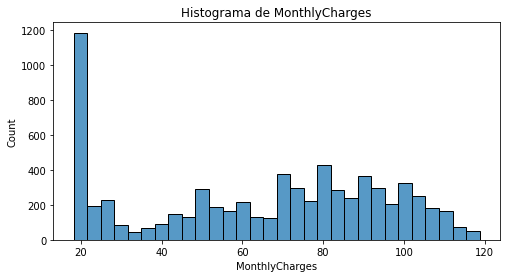

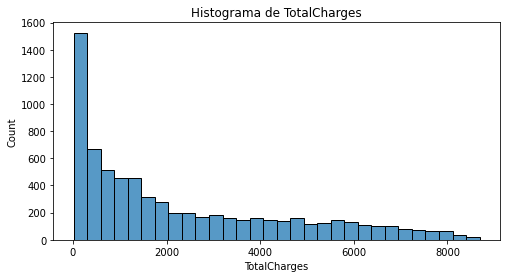

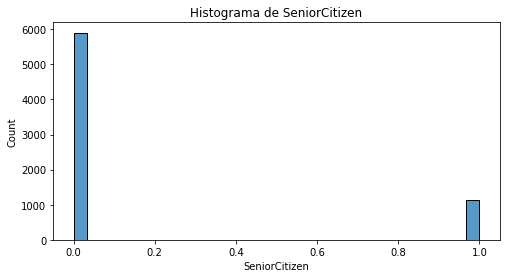

In [ ]:
for col in numeric_cols.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=merged_data, x=col, bins=30)
    plt.title(f'Histograma de {col}')
    plt.show()

#### Conclusão Intermediária
Em nosso sistema, notamos que temos uma taxa de cobrança bastante elevada para os valores mais baixos. Isso nos indica a possibilidade de desenvolver planos com preços mais acessíveis, com o objetivo de atrair ou reter antigos clientes.

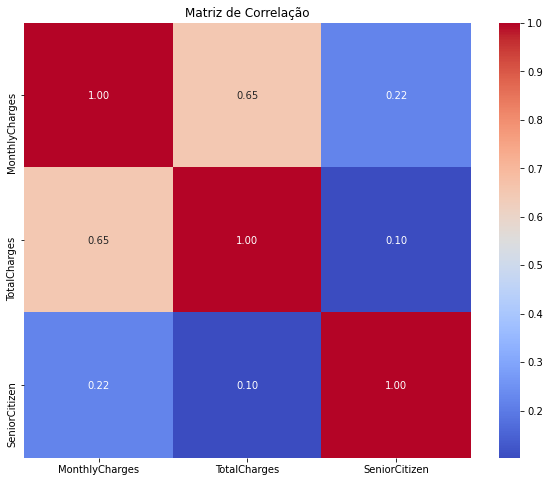

In [ ]:
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

- Há uma correlação mais forte entre as colunas `TotalCharges` e `MonthlyCharges`...

### Pré-processamento de dados:

#### Como foi notado anteriormente, há valores ausente no DataFrame `merged_data` por conta de associações

In [ ]:
median_total_charges = merged_data['TotalCharges'].median()
merged_data['TotalCharges'].fillna(median_total_charges, inplace=True)

* Foi utilizada a mediana para preencher onze valores que estavam ausentes na coluna, foi utilizada essa medida pois ela se aproxima melhor do valor real do que a média, que por sua vez possui uma influencia muito forte de possíveis valores atípicos.

### Analise das colunas categóricas para entender como estão distribuidas os valores.

In [ ]:
columns_to_check = [
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'MultipleLines'
]

for col in columns_to_check:
    top_categories = merged_data[col].value_counts()
    print(f"Coluna: {col}")
    print(top_categories)
    print("\n")

Coluna: InternetService
Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64


Coluna: OnlineSecurity
No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64


Coluna: OnlineBackup
No     3088
Yes    2429
Name: OnlineBackup, dtype: int64


Coluna: DeviceProtection
No     3095
Yes    2422
Name: DeviceProtection, dtype: int64


Coluna: TechSupport
No     3473
Yes    2044
Name: TechSupport, dtype: int64


Coluna: StreamingTV
No     2810
Yes    2707
Name: StreamingTV, dtype: int64


Coluna: StreamingMovies
No     2785
Yes    2732
Name: StreamingMovies, dtype: int64


Coluna: MultipleLines
No     3390
Yes    2971
Name: MultipleLines, dtype: int64




In [ ]:
for col in columns_to_check:
    merged_data[col].fillna('Desconhecido', inplace=True)

#### conclusão intermediária

Vi que os valores das colunas categóricas estão muito próximas, se eu realizasse um preenchimento com valores aleatórios ou com valores que mais se repetiam poderia influenciar no momento de predição, decidi colocar 'Desconhecido' para que não inflêncie caso eu utilize essas colunas.

#### Verificação dos dados

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

- Foram analisados as colunas e os tipos dos dados continuam com as modificações realizadas

### Será criado uma coluna 'Churn' como variável alvo binária (1 para cancelamento, 0 para não cancelamento)

In [ ]:
merged_data['Churn'] = (merged_data['EndDate'] != 'No').astype(int)

## Divisão de dados e construção de modelo:

In [ ]:
categorical_columns = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

X_categorical = pd.get_dummies(merged_data[categorical_columns], drop_first=True)

X_numeric = merged_data[['MonthlyCharges', 'TotalCharges', 'SeniorCitizen']]

X = pd.concat([X_categorical, X_numeric], axis=1)

y = merged_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* O código acima prepara os dados para um modelo de aprendizado de máquina ao codificar variáveis categóricas, selecionar variáveis numéricas relevantes e dividir os dados em conjuntos de treinamento e teste.

## Construção do modelo:

In [ ]:
target_column = 'Churn'

categorical_cols = X_train.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_churn = LogisticRegression()
model_churn.fit(X_train, y_train)

y_pred = model_churn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'Área sob a curva ROC: {roc_auc:.2f}')


Acurácia: 0.82
Precisão: 0.68
Recall: 0.58
F1-Score: 0.63
Área sob a curva ROC: 0.74


* Este código é um exemplo de como construir, treinar e avaliar um modelo de Regressão Logística para prever a rotatividade (`Churn`) com base nos recursos fornecidos. As métricas de avaliação fornecem informações sobre o quão bem o modelo está se saindo na tarefa de classificação binária.

### Validação Cruzada:

In [ ]:
model = LogisticRegression()

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f'Acurácia média na validação cruzada: {mean_cv_score:.2f}')
print(f'Desvio padrão das pontuações: {std_cv_score:.2f}')


Acurácia média na validação cruzada: 0.80
Desvio padrão das pontuações: 0.01


In [ ]:
model = LogisticRegression()

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f'Acurácia média na validação cruzada: {mean_cv_score:.2f}')
print(f'Desvio padrão das pontuações: {std_cv_score:.2f}')


Acurácia média na validação cruzada: 0.83
Desvio padrão das pontuações: 0.01


* O código dá uma estimativa de quão bem o modelo de Regressão Logística está performando em termos de acurácia, levando em consideração a validação cruzada. A acurácia média indica o desempenho médio do modelo em todos os folds, enquanto o desvio padrão das pontuações dá uma ideia da variabilidade do desempenho em diferentes conjuntos de dados de treinamento e teste.

## Conclusão




### Acurácia do Modelo:

* A acurácia do modelo no conjunto de teste é de aproximadamente 82%. Isso significa que o modelo classificou corretamente 82% das instâncias no conjunto de teste.

### Métricas de Classificação:

* **Precisão (Precision):** A precisão do modelo é de aproximadamente 68%. Isso indica que, das instâncias que o modelo classificou como positivas, 68% delas eram realmente positivas. Em outras palavras, o modelo tem uma boa capacidade de evitar falsos positivos.

* **Recall (Revocação ou Sensibilidade):** O recall é de aproximadamente 58%. Isso significa que o modelo identificou corretamente 58% de todas as instâncias positivas no conjunto de teste. O recall é importante quando é crucial evitar falsos negativos (excluir erroneamente instâncias positivas).

* **F1-Score:** O F1-Score, que é a média harmônica entre precisão e recall, é de aproximadamente 63%. É uma métrica útil para encontrar um equilíbrio entre precisão e recall.

* **Área sob a curva ROC (ROC AUC):** A ROC AUC é de aproximadamente 74%. Esta métrica avalia a capacidade do modelo de distinguir entre as classes positiva e negativa. Quanto mais próximo de 1, melhor é o desempenho.

### Validação Cruzada:

* A acurácia média na validação cruzada é de aproximadamente 80%, com um desvio padrão de 1%. Isso sugere que o modelo é consistente em termos de desempenho em diferentes conjuntos de treinamento e teste.

Em resumo, o modelo tem uma boa acurácia geral, mas a precisão e o recall indicam que há espaço para melhorias, especialmente em identificar corretamente as instâncias positivas. A validação cruzada mostra que o desempenho do modelo é relativamente estável em diferentes conjuntos de dados. Pode ser interessante considerar ajustes no modelo ou na seleção de características para melhorar o desempenho nas métricas específicas de interesse.